# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Jonathan Afriliansyah]
- **Email:** [jonafriansyah3@gmail.com]
- **ID Dicoding:** [williamyuei]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana performa penjualan dan revenue perusahaan perbulannya?
- Pertanyaan 2 Produk apa yang paling banyak dan paling sedikit terjual?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [220]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [221]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [222]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [223]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [224]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [225]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [226]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [227]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [228]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [229]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [230]:
products_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [231]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [232]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [233]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [234]:
product_category_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [235]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [236]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/siren-song-of-war/Submission/refs/heads/main/Data/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [237]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Seluruh data yang terkumpul bekerja dengan baik
- Berdasarkan 2 pertanyaan bisnis di awal, kita tidak memerlukan data review, lokasi, seller.

### Assessing Data

In [238]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [239]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [240]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [182]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [241]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [242]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [243]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [244]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [245]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [246]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [247]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [248]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [249]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [250]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [251]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [252]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [253]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [254]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [255]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [256]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [257]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [258]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [259]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [260]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [261]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [262]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [263]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [264]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [265]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [266]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [267]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [268]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Data Customer tidak memiliki nilai kosong, duplikat, maupun inacurrate value.
- Data Orders pada field timestamp, date, dan approved at menggunakan tipe data yang salah, memiliki beberapa nilai kosong, pada field order_approved_at terdapat 160 nilai kosong yang berarti order dibatalkan atau untuk kasus langkan order sudah dikirimkan, sementara pada field order_delivered_carrier_date terdapat 1783 data kosong yang berarti order dibatalkan, sedang diproses, atau unavailable, lalu pada field order_delivered_customer_date terdapat 2965 data kosong yang berarti order dibatalkan, sedang diproses, atau unavailable. Apabila pada suatu record hanya field order_delivered_customer_date yang kosong, maka order tersebut sedang dikirimkan oleh kurir. Tidak terdapat duplikat maupun inacurrate value.
- Data Order Item tidak memiliki nilai kosong, duplikat, maupun inacurrate value.
- Data Order Payments tidak memiliki nilai kosong, duplikat, maupun inacurrate value.
- Data Order review  pada field timestamp dan date menggunakan tipe data yang salah memiliki nilai kosong, tidak ada data duplikat maupun inacurrate value, namun berdasarkan pertanyaan analisis value, kita tidak akan menggunakan data reviews sebagai pertimbangan.
- Data Product Order memiliki 640 nilai kosong di field category_name, name_length, description_length, dan photos, serta 2 nilai kosong di field weight, length, height, dan width. Tidak ada duplikat maupun inacurrate value
- Data Product Category Name Translation tidak memiliki nilai kosong, duplikat, maupun inacurrate value
- Data Seller tidak memiliki nilai kosong, duplikat, maupun inacurrate value

### Cleaning Data

In [269]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.dropna(axis=0, subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [270]:
datetime1_columns = ["shipping_limit_date"]
for column in datetime1_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [271]:
products_df.dropna(axis=0, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- Data Orders perlu dibersihkan. Mengubah tipe data field-field yang sesuai dari object ke datetime. Missing value pada field order_approved_at terdapat beberapa data dengan status delivered, untuk missing value pada field order_approved_at dan order_delivered_carrier_date maka dapat dipastikan order tersebut tidak sampai kepada pembeli, maka data tersebut akan didrop, sementara untuk missing value pada order_delivered_customer_date saja menunjukkan bahwa orderan tersebut sedang diantar, namun kita hanya akan menggunakan data unduk order yang sudah diterima pelanggan, sehingga kita akn drop missing falue pada field order_delivered_customer_date.
- Data Orders Item perlu dibersihkan. Mengubah tipe data shipping_limit_date ke datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [272]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [273]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [274]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [275]:
profit = order_items_df["price"] - order_items_df["freight_value"]
orders_df["profit"] = profit
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,profit
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,100.755431
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-140.530000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,24.530000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,56.310000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,111.830000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,6540.690000


In [276]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,96461
Non Active,2980


In [277]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,profit,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,45.61,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,219.97,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,181.13,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,181.76,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [278]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


In [279]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,40489
RJ,12351
MG,11352
RS,5342
PR,4923
SC,3547
BA,3256
DF,2080
ES,1995


In [280]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [281]:
order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [282]:
order_items_df = order_items_df.drop(columns=["shipping_limit_date"])

In [283]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [284]:
products_df = products_df.drop(columns=["product_name_lenght", "product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"], axis=1)
products_translation_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_translation_df.describe(include="all")

,product_id,product_category_name,product_category_name_english
count,32340,32340,32327
unique,32340,73,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [285]:
products_translation_df.dropna(axis=0, inplace=True)
products_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32339
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32327 non-null  object
 1   product_category_name          32327 non-null  object
 2   product_category_name_english  32327 non-null  object
dtypes: object(3)
memory usage: 1010.2+ KB


In [286]:
orders_customers_df = orders_customers_df.drop(columns=[ "order_purchase_timestamp","order_estimated_delivery_date","customer_zip_code_prefix","customer_city","customer_state"])
order_products_translation_df = pd.merge(
    left=products_translation_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

order_products_translation_df.describe(include="all")

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,price,freight_value
count,111022,111022,111022,111022,111022.000000,111022,111022.000000,111022.000000
unique,32327,71,71,97255,NaN,3033,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,bed_bath_table,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN
freq,527,11115,11115,21,NaN,2033,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.198231,NaN,120.738772,20.025485
std,NaN,NaN,NaN,NaN,0.706934,NaN,183.292804,15.841529
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,74.990000,16.310000
75%,NaN,NaN,NaN,NaN,1.000000,NaN,134.900000,21.180000


In [287]:
all_df = pd.merge(
    left=order_products_translation_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.describe(include="all")

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,profit,customer_unique_id,status
count,111022,111022,111022,111022,111022.000000,111022,111022.000000,111022.000000,108621,108621,108621,108621,108621,108621.000000,108621,108621
unique,32327,71,71,97255,NaN,3033,NaN,NaN,95110,2,NaN,NaN,NaN,NaN,92063,1
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,bed_bath_table,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,c8460e4251689ba205045f3ea17884a1,Active
freq,527,11115,11115,21,NaN,2033,NaN,NaN,21,108614,NaN,NaN,NaN,NaN,24,108621
mean,NaN,NaN,NaN,NaN,1.198231,NaN,120.738772,20.025485,NaN,NaN,2018-01-03 07:13:21.566465280,2018-01-06 03:22:28.473655808,2018-01-15 07:56:20.941613312,100.908387,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.850000,0.000000,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,-140.530000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,39.900000,13.080000,NaN,NaN,2017-09-16 12:15:16,2017-09-19 17:41:32,2017-09-27 18:27:55,24.790000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,74.990000,16.310000,NaN,NaN,2018-01-22 19:14:35,2018-01-25 12:22:38,2018-02-05 13:38:33,56.540000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,NaN,134.900000,21.180000,NaN,NaN,2018-05-07 16:52:25,2018-05-09 09:01:00,2018-05-16 15:27:37,112.220000,NaN,NaN
max,NaN,NaN,NaN,NaN,21.000000,NaN,6735.000000,409.680000,NaN,NaN,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,6540.690000,NaN,NaN


In [288]:
all_df.head()

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,profit,customer_unique_id,status
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,314.11,b1a1199364a4a7fe27c4486ab63f550d,Active
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,191.11,4b86049cb99e4aa774031daa9cd18f18,Active
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,23.24,f63805d9c7edb84d92413af34b86a39c,Active
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,88.66,619e926d09b26efbd5180368b1ddc874,Active
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,11.93,ad353b4fb0e294adc4eda48af73e68a6,Active


**Insight:**
- Dari Data Customer dapat ditarik kesimpulan bahwa pelanggan terbanyak berasal dari State SP yaitu sebanyak 41746, lalu sebanyak 15540 pelanggan berasal dari kota Sao Paolo
- Dari Data Customer dan Order Jumlah pelanggan aktif 96461, sedangkan pelanggan tidak aktif sejumlah 2980 orang. Adapun kota dengan jumlah order terbanyak adalah 15044 dari Sao Paolo dan 6603 order dari kota Rio de Janairo. Adapun state dengan jumlah order terbanyak ada 40489 dari SP dan 12351 dari RJ
- Dari Data Order dapat ditarik kesimpulan bahwa barang termahal yang dijual memiliki harga 6735 dan harga termurah 0,85, lalu kita drop semua product yang meiliki missing value (product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm). Kemudian gabungkan DF product dengan translasinya. Lalu gabungkan product_translasi_df dengan order_item
- Karena kita tidak perlu memetakan daerah penjualan, maka kita dapat menghilangkan kolom-kolom yang tidak perlu.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-301-a9b0acd9d41d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({


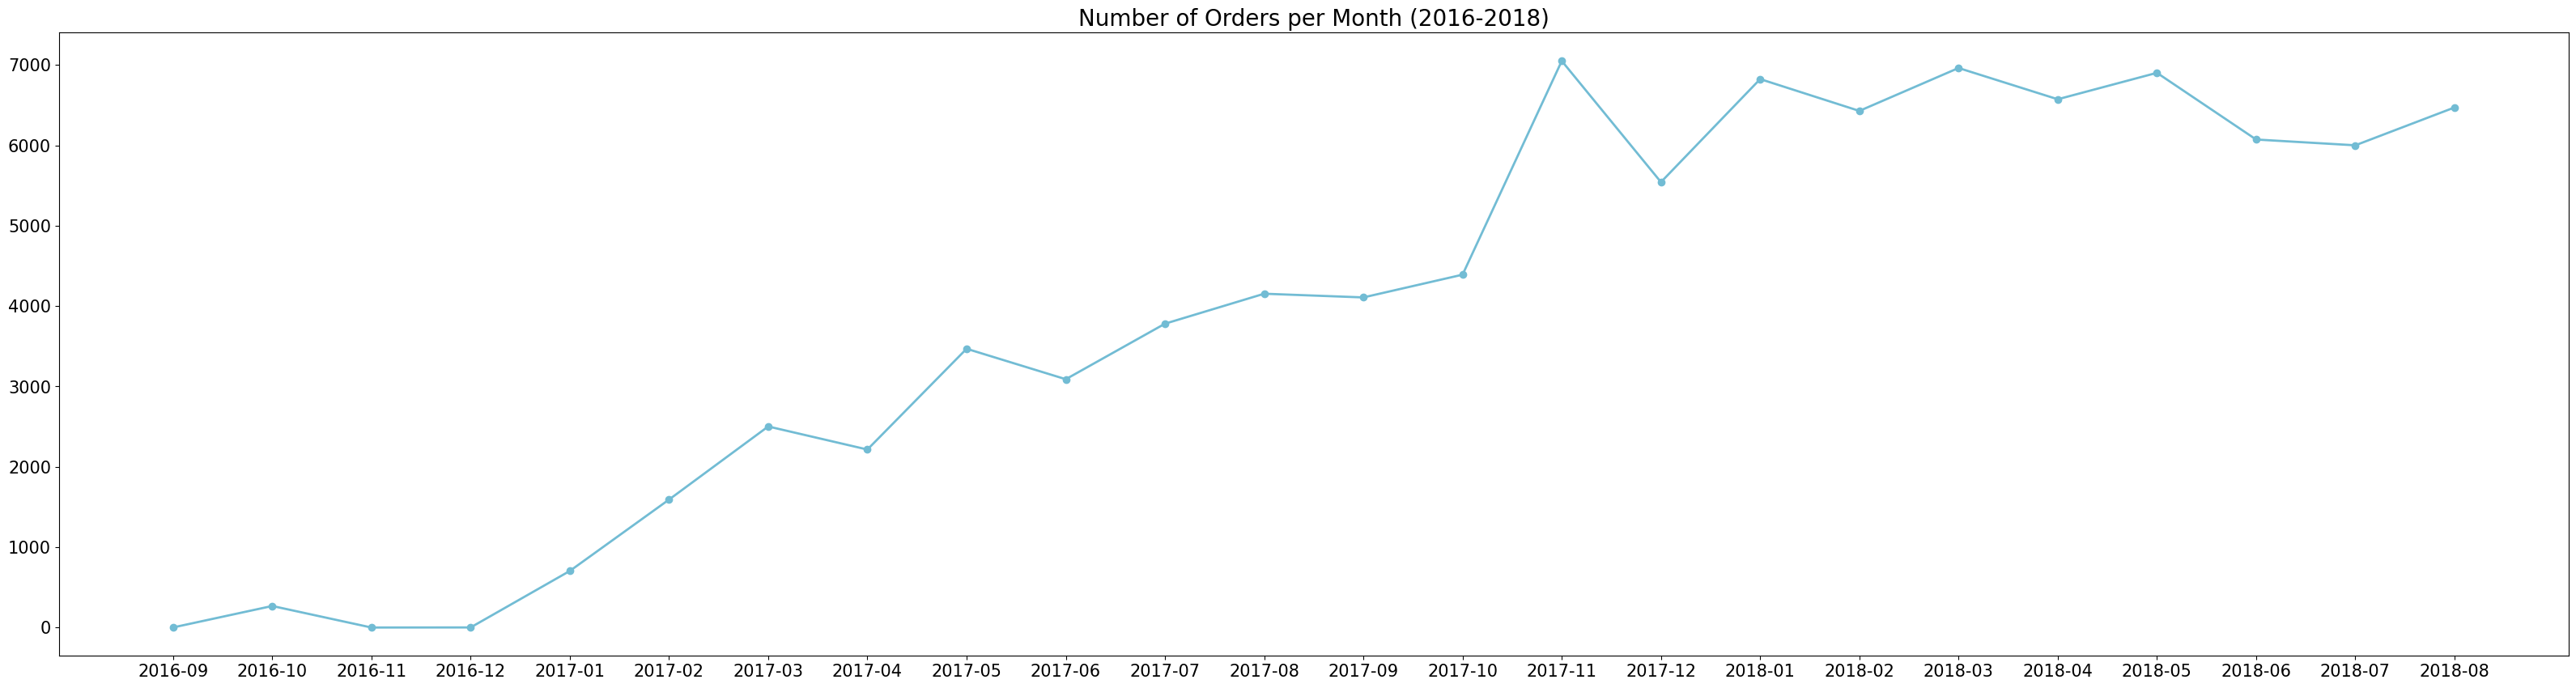

In [301]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "profit": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

plt.figure(figsize=(40, 10))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

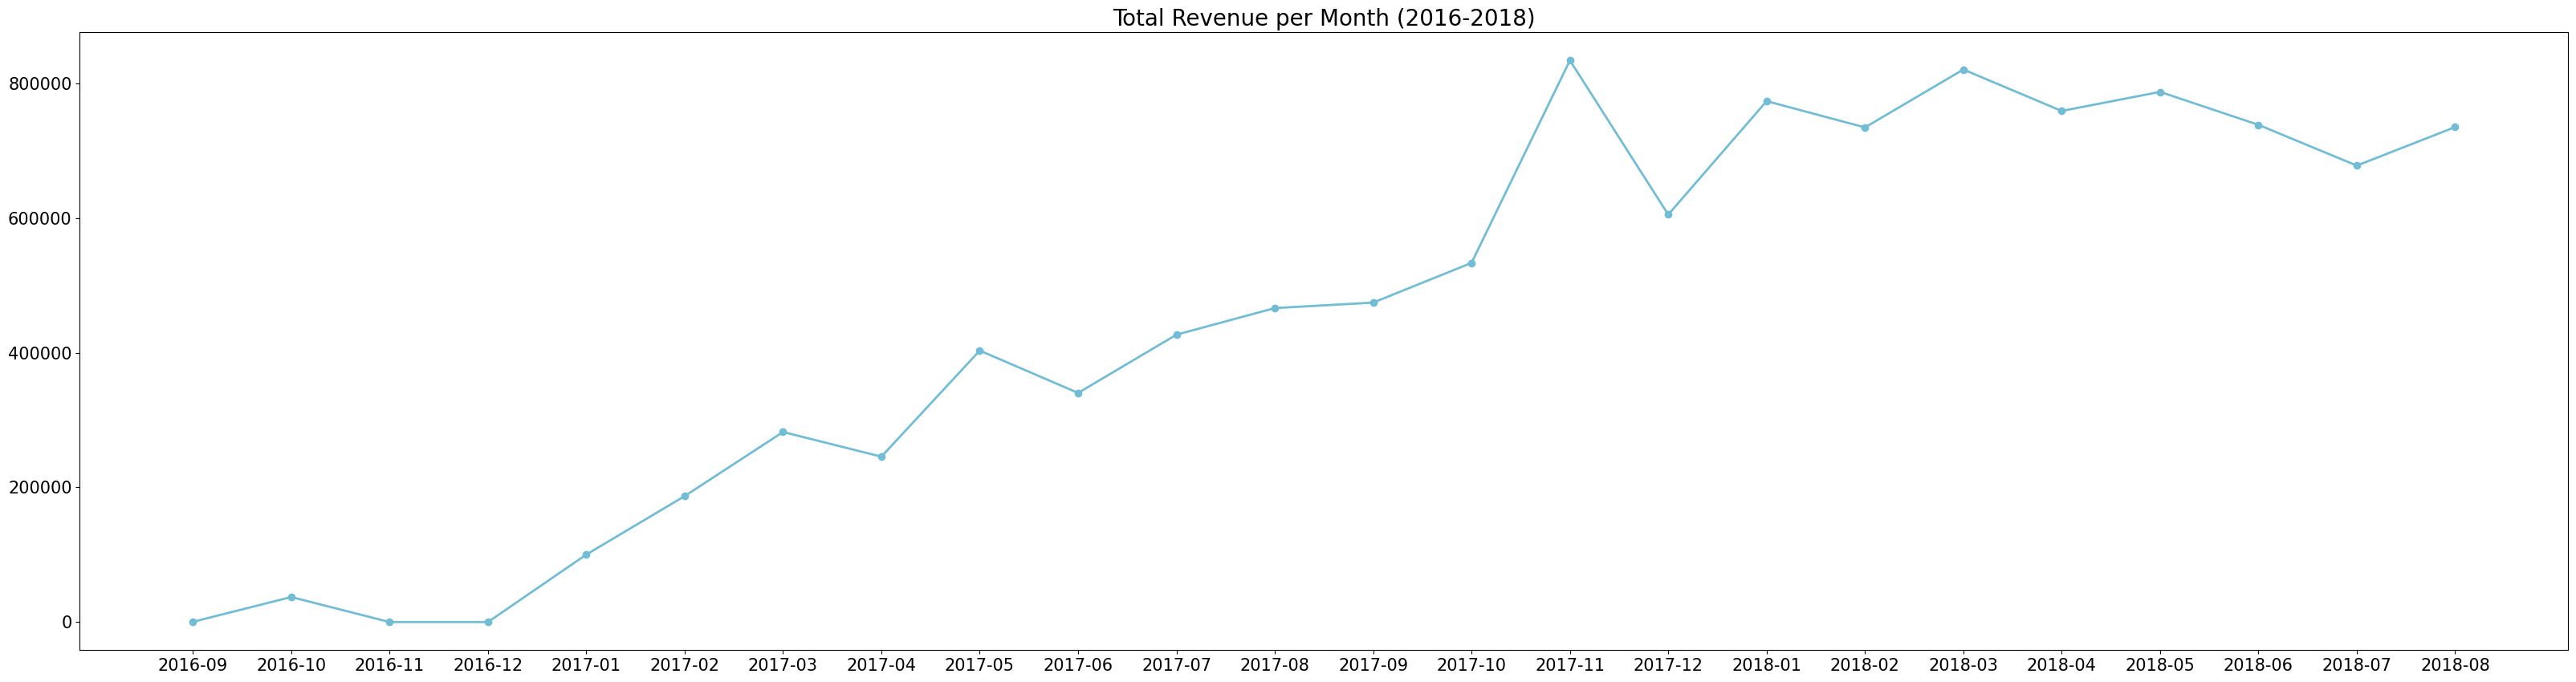

In [302]:
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

plt.figure(figsize=(40, 10))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["profit"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Insight:**
- Profit perusahaan memiliki tren naik dengan profit tertinggi perusahaan terjadi di tahun 2017 bulan November sekitar lebih dari 800000
- Profit perusahaan dari bulan September hingga Desember tahun 2016 kurang dari 15000

### Pertanyaan 2:

<ipython-input-290-04edc5304344>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-290-04edc5304344>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


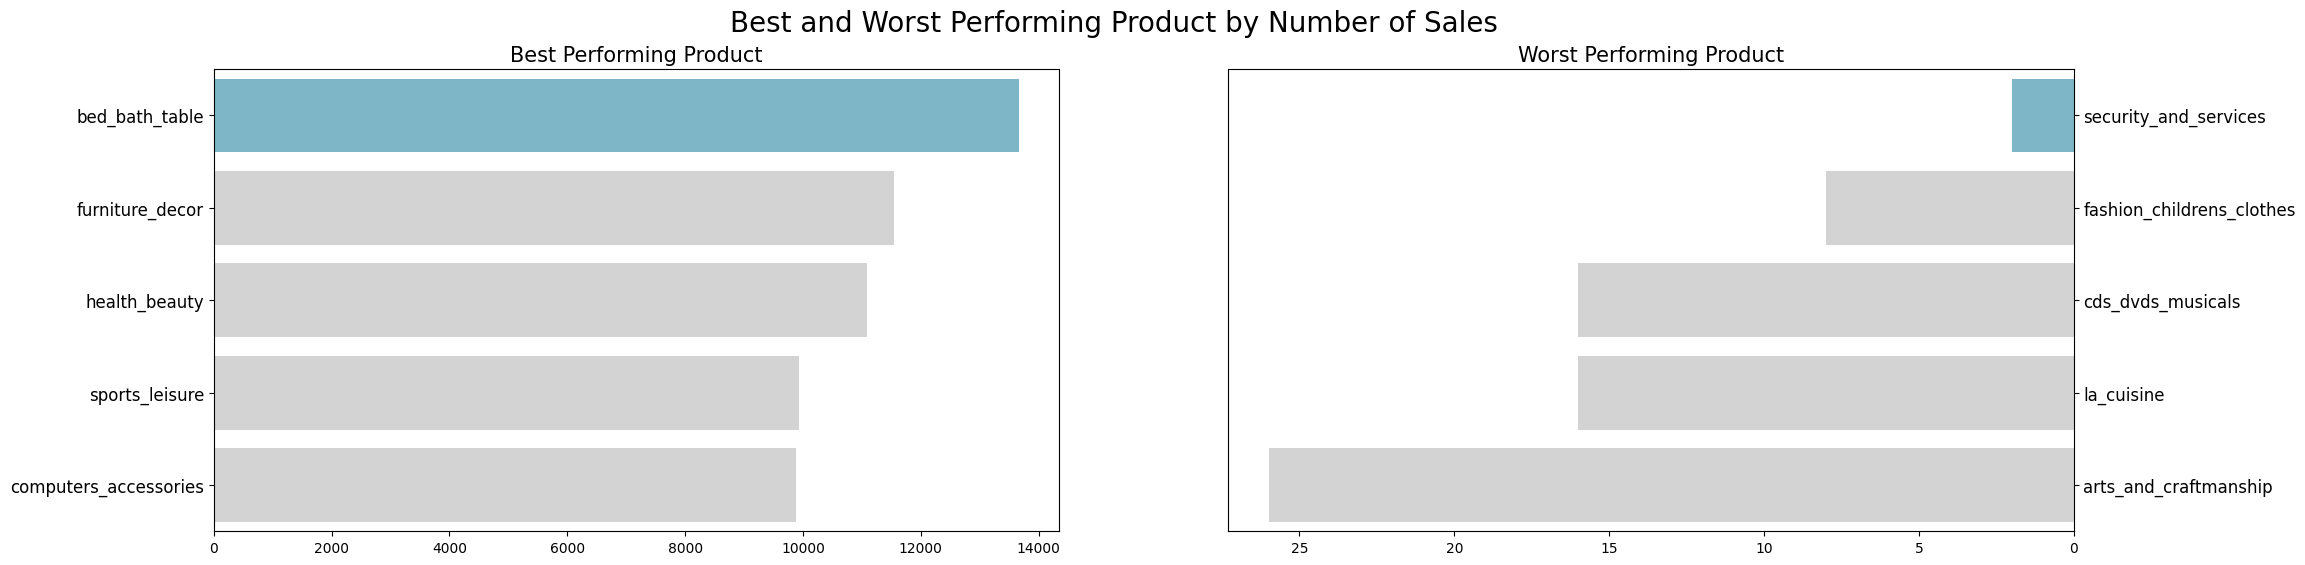

In [290]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- bed_bath_table merupakan produk terlaris perusahaan dengan penjualan mendekati 14000 unit
- security_and_services merupakan produk yang jarang dibeli dengan penjualan hanya sebanyak 1 unit

## Analisis Lanjutan (Opsional)

<ipython-input-292-b5583a788b84>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-292-b5583a788b84>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-292-b5583a788b84>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(

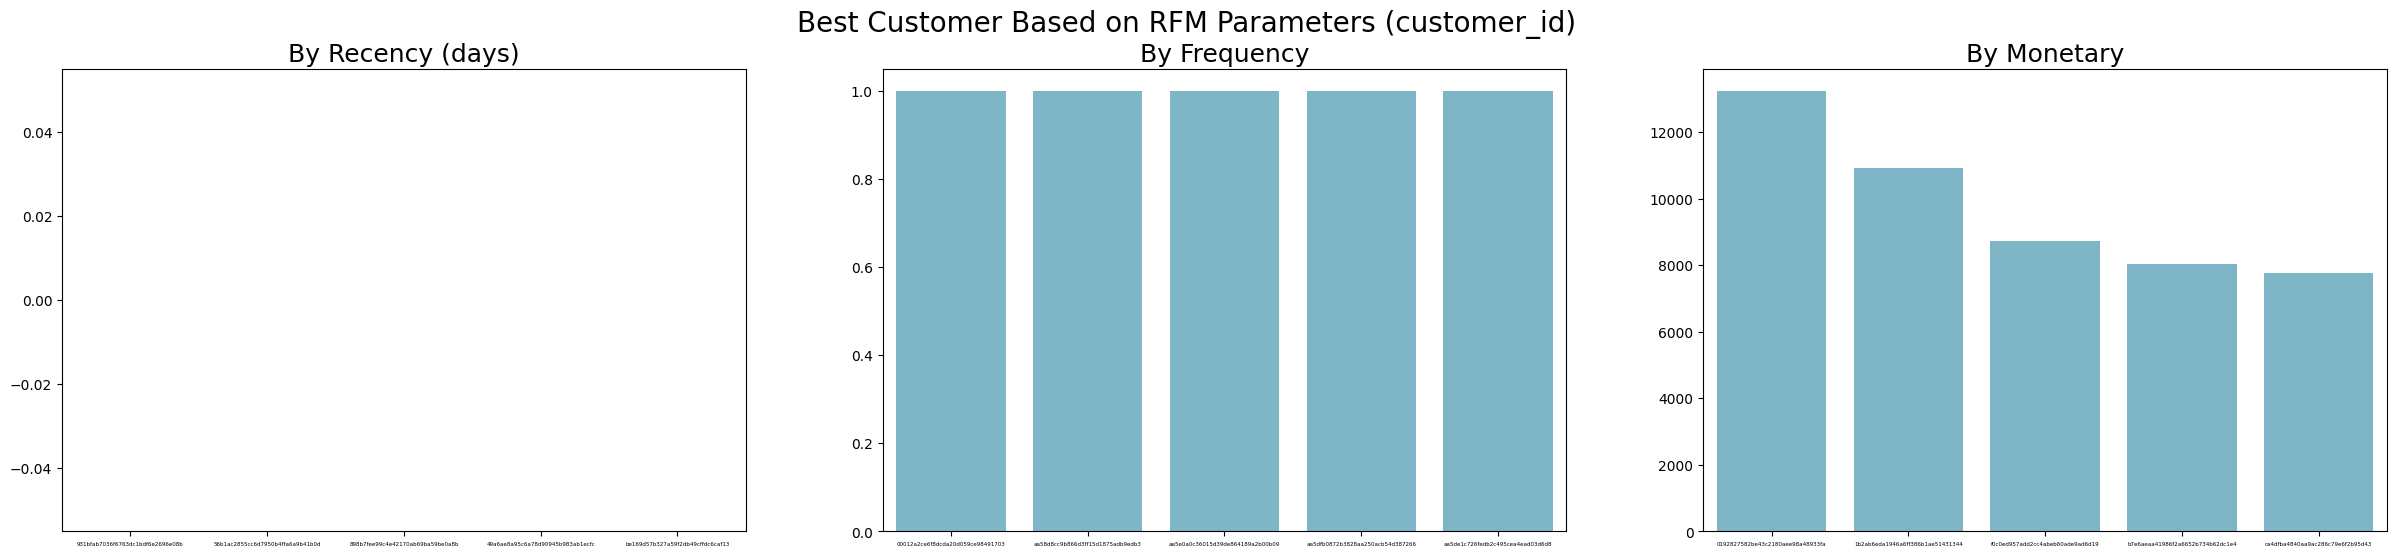

In [292]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "profit": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=4)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=4)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=4)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Profit perusahaan memiliki tren naik dengan profit tertinggi perusahaan terjadi di tahun 2017 bulan November sekitar lebih dari 800000, Profit perusahaan dari bulan September hingga Desember tahun 2016 kurang dari 15000. 4 bulan pertama merupakan masa-masa sulit bagi perusahaan, namun tren profit yang naik menunjukkan performa perusahaan meningkat
- bed_bath_table merupakan produk terlaris perusahaan dengan penjualan mendekati 14000 unit, security_and_services merupakan produk yang jarang dibeli dengan penjualan hanya sebanyak 1 unit. bed_bath_table merupakan produk terlaris hal ini menunjukkan bahwa pelanggan cenderung untuk membeli furnitur rumah.

In [293]:
all_df.info()
all_df.to_csv("all_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111022 entries, 0 to 111021
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     111022 non-null  object        
 1   product_category_name          111022 non-null  object        
 2   product_category_name_english  111022 non-null  object        
 3   order_id                       111022 non-null  object        
 4   order_item_id                  111022 non-null  int64         
 5   seller_id                      111022 non-null  object        
 6   price                          111022 non-null  float64       
 7   freight_value                  111022 non-null  float64       
 8   customer_id                    108621 non-null  object        
 9   order_status                   108621 non-null  object        
 10  order_approved_at              108621 non-null  datetime64[ns]
 11  